<center><h1><u>Retail Sales Prediction</center></h1></u>




In [ ]:
#importing the necessary libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib


plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [ ]:
#reading the data
furniture=pd.read_csv('superstore.csv',encoding='unicode_escape',parse_dates=['Order Date'])
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


We need only the dates and sales on that particular date for forecasting the sales. Hence we drop all the other columns.

In [ ]:
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']

furniture.drop(cols,axis=1,inplace=True)

furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [ ]:
# Sorting the Order Date 
furniture=furniture.sort_values('Order Date')

print(furniture.head(1))
furniture.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

There are no missing values, hence we can proceed further. 

In [ ]:
# grouping sales according to Order Date
furniture.groupby('Order Date')['Sales'].sum().reset_index()


# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [ ]:
#setting 'Order Date' as index
furniture=furniture.set_index('Order Date')
furniture.index


DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [ ]:
#Let's average the daily sales value for each month 
#then we use start of each month as the timestamp
y = furniture['Sales'].resample('MS').mean()

y['2017':]


Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

Plotting the resampled data using plot function of matplotlib.

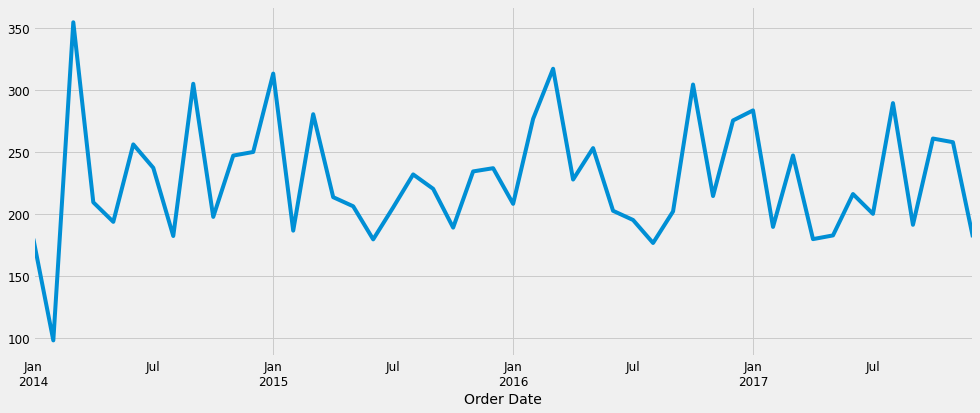

In [ ]:
y.plot(figsize=(15,6))
plt.show()

Now lets decompoe our data into its various components like trend, seasonality and residual using the sm.tsa.seasonal_decompose to do so. 

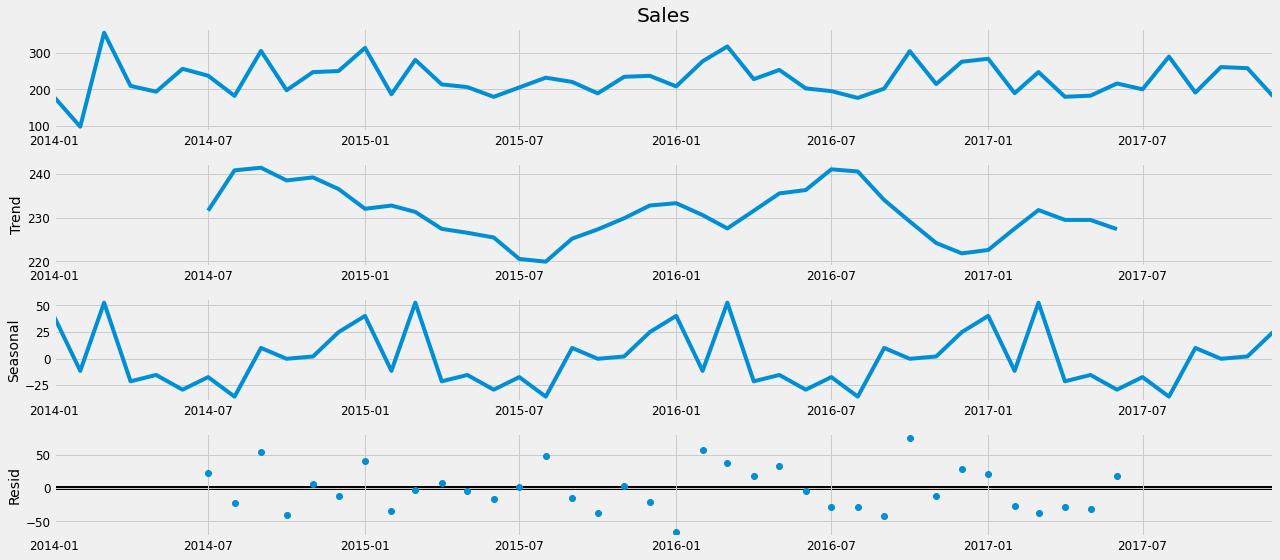

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
#decomposing the data
decomposition=sm.tsa.seasonal_decompose(y,model='additive')
#plotting the decomposed data
fig=decomposition.plot()
plt.show()

Next we create a list for p,d,q values.
* p: order of Autoregressive model (AR model)
* d: no. of differencing required for stationary data
* q: order of Moving Average model (MA model)

Considering these values in the range 0 to 2(exclusive) using range function.We use itertools to get product of p,d,q which means, it creates combinations of p,d,q.We also create a list having all these values along with seasonality as 12.

In [ ]:
p=d=q=range(0,2)
pdq = list(itertools.product(p, d, q))

#creating a new list using list comprehension
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


#Let's print some of the combination examples
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX:{}x{}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX:{}x{}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX:{}x{}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX:{}x{}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX:(0, 0, 1)x(0, 0, 1, 12)
SARIMAX:(0, 0, 1)x(0, 1, 0, 12)
SARIMAX:(0, 1, 0)x(0, 1, 1, 12)
SARIMAX:(0, 1, 0)x(1, 0, 0, 12)


After getting combinations of parameters, we need to find the best set of parameters. To achieve this, we use grid search method. Grid search builds a model for every combination of hyperparameters specified and evaluates each model. This helps in selecting the best parameters.

We apply the sm.tsa.statespace.SARIMAX to the data by specifying all combinations of parameters one by one.

In [ ]:

#iterating through pdq
for param in pdq:
    #iterating through seasonal_pdq
    for param_seasonal in seasonal_pdq:
        
        try:
            #applying SARIMAX
            mod=sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False)
            #fitting the model
            result=mod.fit()
            #printing the results
            print('ARIMA{}x{}12-AIC:{}'.format(param,param_seasonal,result.aic))
        
        except:
            
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:661.5238453481245
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:2036.6537918985382
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:402.07466784791774


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:396.82026498080984
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:568.0812131281632
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:563.3702891485038
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:395.73870136529524
ARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:397.7103607987577
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:624.7073376670764


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:2459.5848640311883
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:404.0572383632072
ARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:398.30739030836077
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:565.8511871095109
ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:563.4641112898405
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:397.2652484384289
ARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:399.1166245099375
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:539.8605974537055
ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:2011.5294030707894
ARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:413.4421987151014


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12-AIC:411.77118682003294
ARIMA(0, 1, 0)x(1, 0, 0, 12)12-AIC:540.1473655055299


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12-AIC:1859.1141380521283
ARIMA(0, 1, 0)x(1, 1, 0, 12)12-AIC:411.15022416049396
ARIMA(0, 1, 0)x(1, 1, 1, 12)12-AIC:413.03496183306027
ARIMA(0, 1, 1)x(0, 0, 0, 12)12-AIC:505.2494190718199


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12-AIC:1964.286978455417
ARIMA(0, 1, 1)x(0, 1, 0, 12)12-AIC:397.5664610839781
ARIMA(0, 1, 1)x(0, 1, 1, 12)12-AIC:393.23114179461135
ARIMA(0, 1, 1)x(1, 0, 0, 12)12-AIC:507.00994558513264


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12-AIC:2126.5102702394647
ARIMA(0, 1, 1)x(1, 1, 0, 12)12-AIC:392.09332875534153
ARIMA(0, 1, 1)x(1, 1, 1, 12)12-AIC:394.090668496603
ARIMA(1, 0, 0)x(0, 0, 0, 12)12-AIC:553.9945048913812


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12-AIC:2330.406956135381
ARIMA(1, 0, 0)x(0, 1, 0, 12)12-AIC:404.062030075632
ARIMA(1, 0, 0)x(0, 1, 1, 12)12-AIC:398.38088151787497
ARIMA(1, 0, 0)x(1, 0, 0, 12)12-AIC:552.9272857949779
ARIMA(1, 0, 0)x(1, 0, 1, 12)12-AIC:553.580386072722
ARIMA(1, 0, 0)x(1, 1, 0, 12)12-AIC:397.27571034278384
ARIMA(1, 0, 0)x(1, 1, 1, 12)12-AIC:399.1471414739075


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12-AIC:520.9356900885425


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12-AIC:2210.3250928593425
ARIMA(1, 0, 1)x(0, 1, 0, 12)12-AIC:405.5034128343282
ARIMA(1, 0, 1)x(0, 1, 1, 12)12-AIC:397.0752637438201


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12-AIC:522.7175719632714
ARIMA(1, 0, 1)x(1, 0, 1, 12)12-AIC:524.6218348973028
ARIMA(1, 0, 1)x(1, 1, 0, 12)12-AIC:396.0818242406298
ARIMA(1, 0, 1)x(1, 1, 1, 12)12-AIC:397.9267379168208
ARIMA(1, 1, 0)x(0, 0, 0, 12)12-AIC:519.8818905467368


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12-AIC:1954.6840821844332
ARIMA(1, 1, 0)x(0, 1, 0, 12)12-AIC:408.0593708053003
ARIMA(1, 1, 0)x(0, 1, 1, 12)12-AIC:402.67176668679684
ARIMA(1, 1, 0)x(1, 0, 0, 12)12-AIC:521.8609414869409


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12-AIC:1954.8936290053853
ARIMA(1, 1, 0)x(1, 1, 0, 12)12-AIC:399.85308065729384
ARIMA(1, 1, 0)x(1, 1, 1, 12)12-AIC:401.4986580937762
ARIMA(1, 1, 1)x(0, 0, 0, 12)12-AIC:505.56288669332685


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12-AIC:1920.4180004674593
ARIMA(1, 1, 1)x(0, 1, 0, 12)12-AIC:399.561900807124
ARIMA(1, 1, 1)x(0, 1, 1, 12)12-AIC:395.0251886261382
ARIMA(1, 1, 1)x(1, 0, 0, 12)12-AIC:507.5224773702382


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12-AIC:1901.097742784712
ARIMA(1, 1, 1)x(1, 1, 0, 12)12-AIC:393.8481987643638
ARIMA(1, 1, 1)x(1, 1, 1, 12)12-AIC:395.8117139867474


Let's check for parameters that give the lowest AIC Score. Then we use these parameters to train the final model.

In [ ]:
#Fitting the ARIMA model using above optimal combination of p, d, q
#training the model
model=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,0,12))

#fitting the model
result=model.fit()

print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1393   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


Now, let's get the predictions from date '2017-01-01' by using the get_prediction function. Passing the value pd.to_datetime('2017-01-01') to the start parameter

In [ ]:
prediction=result.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
#obtaining confidence range using conf_int()
prediction_ci=prediction.conf_int()
prediction_ci

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949829,380.855435
2017-02-01,128.374776,341.873714
2017-03-01,201.126554,414.265415
2017-04-01,122.357191,335.174994
2017-05-01,126.153430,338.683179
2017-06-01,87.013282,299.283140
2017-07-01,92.953016,304.987211
2017-08-01,102.323360,314.142881
2017-09-01,103.098060,314.721216


Its time to visualize our predicted data.

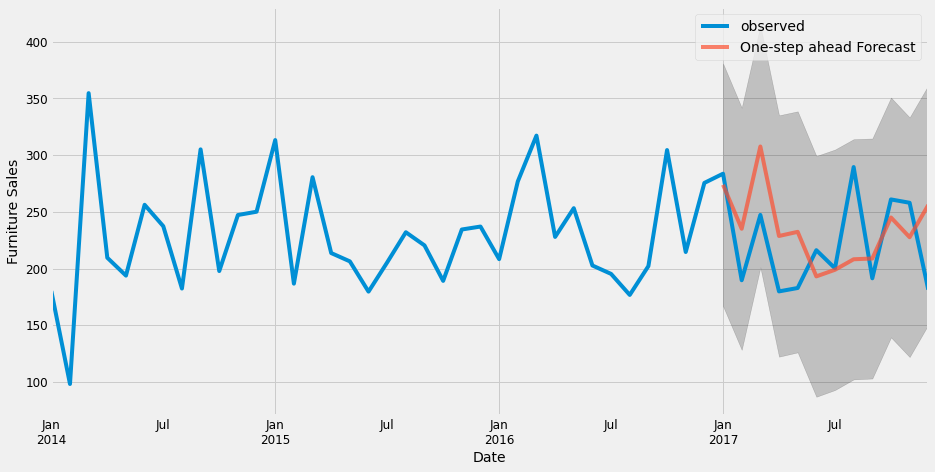

In [ ]:
#plotting observed data after 2014
ax=y['2014':].plot(label='observed')
prediction.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Let's check the evaluation scores like Squared mean error and root mean squared error.

In [ ]:
y_hat=prediction.predicted_mean
y_truth = y['2017-01-01':]

mse=((y_hat-y_truth)**2).mean()
#taking square root of mse to get rmse
rmse=np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse,2)))

The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


Now forecasting the out sample data and plotting it by using get_forecast on result to get the forecasted values.

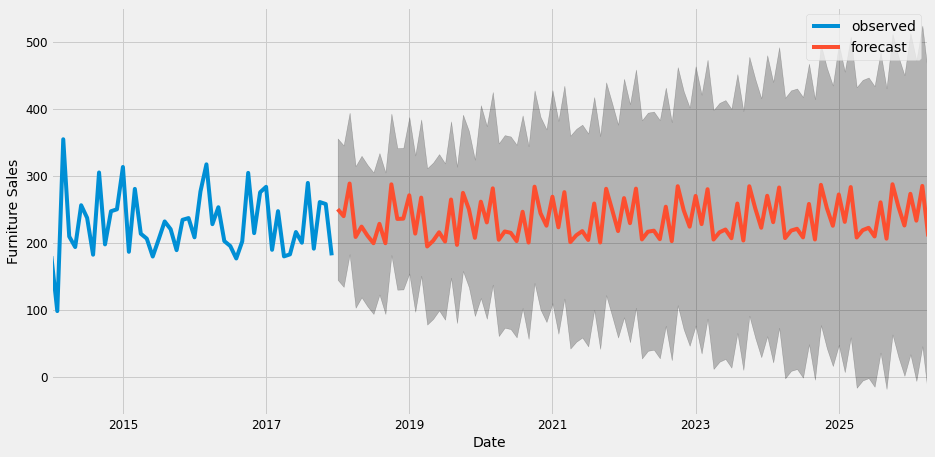

In [ ]:
pred_uc=result.get_forecast(steps=100)
pred_ci=pred_uc.conf_int()
ax=y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='forecast')
#filling area between confidence range
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality.
As we forecast further out into the future, it is natural for us to become less confident in our values.
This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.